# M06 Exercises

DS 5100 Programming for Data Science

# Set Up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
np.__version__

'1.24.4'

In [3]:
pd.__version__

'2.0.3'

# Exercise 6.1

Create a data frame called `df` by passing a dictionary of inputs with the following keys and values:

`feature` containing a list of $5$ floats.

`labels` containing a list of $5$ integers between $0$ and $2$ inclusive.  

Hint: Pass the dict to `pd.DataFrame()`.

Then show the data frame.

In [4]:
df = pd.DataFrame({
    'feature': [0.2, -1.1, 1.6, 5.4], 
    'labels': [1, 1, 0, 2]
})

In [5]:
df

,feature,labels
0,0.2,1
1,-1.1,1
2,1.6,0
3,5.4,2


# Exercise 6.2

Rename the `labels` column in `df` to `label`.

In [6]:
df = df.rename(columns={'labels': 'label'})

In [7]:
df

,feature,label
0,0.2,1
1,-1.1,1
2,1.6,0
3,5.4,2


# Exercise 6.3

Import the iris dataset from Seaborn and the sort by species, descending.

Hint: 
```python
iris = sns.load_dataset('iris')
```

In [8]:
iris = sns.load_dataset('iris') 

In [9]:
iris.sort_values('species', ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
111,6.4,2.7,5.3,1.9,virginica
122,7.7,2.8,6.7,2.0,virginica
121,5.6,2.8,4.9,2.0,virginica
120,6.9,3.2,5.7,2.3,virginica
...,...,...,...,...,...
31,5.4,3.4,1.5,0.4,setosa
30,4.8,3.1,1.6,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa


In [10]:
iris.sort_values('species', ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
111,6.4,2.7,5.3,1.9,virginica
122,7.7,2.8,6.7,2.0,virginica
121,5.6,2.8,4.9,2.0,virginica
120,6.9,3.2,5.7,2.3,virginica
...,...,...,...,...,...
31,5.4,3.4,1.5,0.4,setosa
30,4.8,3.1,1.6,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa


# Exercise 6.4

Use `.value_counts()` to find out how many records of each species the dataset has.

In [11]:
iris.species.value_counts().to_frame('n')

,n
species,
setosa,50
versicolor,50
virginica,50


In [12]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Exercise 6.5

Show the number of records in `iris` where `petal_length` $<= 1.4$ or `petal_length` $>= 1.6$  

Hint: Remember how to implement "or" in Pandas.

Hint: Subset using boolean indexing, and count the number of resulting records with `len()` or `.shape[0]`.

In [13]:
len(iris[(iris.petal_length <= 1.4) | (iris.petal_length >= 1.6)])

137

In [14]:
iris[(iris.petal_length <= 1.4) | (iris.petal_length >= 1.6)].shape[0]

137

# Exercise 6.6

Use `.apply()` to append a new column that displays the minimum of (`petal_length`, `petal_width`) for each observation.

Display the head, tail of the new data frame to check if things look correct.

Hint: Use a lambda function to compute the minimum.

In [15]:
iris['min_petal'] = iris.apply(lambda x: min(x.petal_length, x.petal_width), axis=1)

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,min_petal
0,5.1,3.5,1.4,0.2,setosa,0.2
1,4.9,3.0,1.4,0.2,setosa,0.2
2,4.7,3.2,1.3,0.2,setosa,0.2
3,4.6,3.1,1.5,0.2,setosa,0.2
4,5.0,3.6,1.4,0.2,setosa,0.2


In [17]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,min_petal
145,6.7,3.0,5.2,2.3,virginica,2.3
146,6.3,2.5,5.0,1.9,virginica,1.9
147,6.5,3.0,5.2,2.0,virginica,2.0
148,6.2,3.4,5.4,2.3,virginica,2.3
149,5.9,3.0,5.1,1.8,virginica,1.8


We can see that in all cases petal length is greater than petal width. 

In [18]:
sum(iris.petal_length <= iris.petal_width)

0

In [19]:
iris[['petal_length','petal_width']].idxmin(axis=1).value_counts()

petal_width    150
Name: count, dtype: int64

# Exercise 6.7

Use a pivot table to compute the following statistics on `sepal_width` and `petal_width` grouped by species:

- median  
- mean

These can be computed together in a single call to `pd.pivot_table()`.

In [20]:
pd.pivot_table(iris, 
               values = ["sepal_width", "petal_width"], 
               columns = ["species"], 
               aggfunc = {np.mean, np.median})  # Braces groups rows

species             setosa  versicolor  virginica
petal_width mean     0.246       1.326      2.026
            median   0.200       1.300      2.000
sepal_width mean     3.428       2.770      2.974
            median   3.400       2.800      3.000

In [21]:
pd.pivot_table(iris, 
               values = ["sepal_width", "petal_width"], 
               columns = ["species"], 
               aggfunc = [np.mean, np.median]) # Brackets groups cols

mean                      median                     
species     setosa versicolor virginica setosa versicolor virginica
petal_width  0.246      1.326     2.026    0.2        1.3       2.0
sepal_width  3.428      2.770     2.974    3.4        2.8       3.0

In [22]:
pd.pivot_table(iris, 
               values = ["sepal_width", "petal_width"], 
               columns = ["species"], 
               aggfunc = [np.mean, np.median]).T # Brackets groups cols

petal_width  sepal_width
       species                             
mean   setosa            0.246        3.428
       versicolor        1.326        2.770
       virginica         2.026        2.974
median setosa            0.200        3.400
       versicolor        1.300        2.800
       virginica         2.000        3.000

# Exercise 6.8

Create two data frames with a common index column, `first_name`, and a single feature column.

In the first, name the feature column `age` and have two observations.

In the second, name the feature column `height` and have three observations. 

Make sure two of the index values in the two data frames are shared.

Also, remember that indexes should have unique values.

Hint: Pass dictionaries to the data frame constructor.

In [23]:
left = pd.DataFrame({"key": ["jamie", "bill"], "age": [15, 22]})
left = left.set_index('key')

In [24]:
left

,age
key,
jamie,15
bill,22


In [25]:
right = pd.DataFrame({"key": ["jamie", "bill", "asher"], "height": [6, 5, 7]})
right = right.set_index('key')

In [26]:
right

,height
key,
jamie,6
bill,5
asher,7


# Exercise 6.9

With the data frames you just created, use `pd.merge()` to join the tables using an inner join.

Then use `df.join()` to join the tables using an outer join.

In [27]:
inner = pd.merge(left, right, on="key", how="inner")

In [28]:
inner

,age,height
key,,
jamie,15,6
bill,22,5


In [29]:
outer = left.join(right, how='outer')

In [30]:
outer

,age,height
key,,
asher,NaN,7
bill,22.0,5
jamie,15.0,6


# Exercise 6.10

Create a series with the data $[1, 1, 2, 3, 5, 8]$.

Extract the data from the series in a NumPy array and reshape to $2 \times 3$.  

Print both the reshaped data and its dimensions.

In [31]:
ser = pd.Series([1, 1, 2, 3, 5, 8])
vals = ser.values
resh = vals.reshape(2,3)

In [32]:
resh

array([[1, 1, 2],
       [3, 5, 8]])

In [33]:
resh.shape

(2, 3)

# Exercise 6.11

The data frame below contains two categoricals. 

Dummify each of them, giving them an appropriate prefix and dropping the first level from each. 

```python
cats = pd.DataFrame({
    'breed':['persian','persian','siamese','himalayan','burmese'], 
    'color':['calico','white','seal point','cream','sable']
})
```

Hint: You can pass a list to the `prefix` parameter to apply prefixes to more than one column.

In [34]:
cats = pd.DataFrame({
    'breed':['persian', 'persian', 'siamese', 'himalayan', 'burmese'], 
    'color':['calico', 'white', 'seal point', 'cream', 'sable']
})

In [35]:
cats

,breed,color
0,persian,calico
1,persian,white
2,siamese,seal point
3,himalayan,cream
4,burmese,sable


In [36]:
cats_combo = pd.get_dummies(cats, prefix=['b','c'])

In [37]:
cats_combo

,b_burmese,b_himalayan,b_persian,b_siamese,c_calico,c_cream,c_sable,c_seal point,c_white
0,False,False,True,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,True,False
3,False,True,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False


No prefix

In [38]:
pd.get_dummies(cats)

,breed_burmese,breed_himalayan,breed_persian,breed_siamese,color_calico,color_cream,color_sable,color_seal point,color_white
0,False,False,True,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,True,False
3,False,True,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False


In [39]:
pd.get_dummies(cats).T

,0,1,2,3,4
breed_burmese,False,False,False,False,True
breed_himalayan,False,False,False,True,False
breed_persian,True,True,False,False,False
breed_siamese,False,False,True,False,False
color_calico,True,False,False,False,False
color_cream,False,False,False,True,False
color_sable,False,False,False,False,True
color_seal point,False,False,True,False,False
color_white,False,True,False,False,False


# Exercise 6.12

Create two Series of floats of unqual length and letters for index names.

In the first `s1` use these arguments in the constructure `pd.Series()`:

- `[7.3, -2.5, 3.4, 1.5]` and `index=['a', 'c', 'd', 'e']`

In the second `s2` use these:

- `[-2.1, 3.6, -1.5, 4, 3.1]` and `index=['a', 'c', 'e', 'f', 'g']`

Then add the two together with the plus `+` operator. What do you see?

In [40]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [41]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [42]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [43]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

Note that Pandas assumens the indexes belong to a common domain.

# Demonstration

We demonstrate the same principle of interpolation with data frames.

In [44]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [45]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [46]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [47]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [48]:
(df1 + df2).fillna(0).style.background_gradient(axis=None, cmap='YlGnBu')

,b,c,d,e
Colorado,0.000000,0.000000,0.000000,0.000000
Ohio,3.000000,0.000000,6.000000,0.000000
Oregon,0.000000,0.000000,0.000000,0.000000
Texas,9.000000,0.000000,12.000000,0.000000
Utah,0.000000,0.000000,0.000000,0.000000


# Exercise 6.13

Using the `penguins` dataset from Seaborn, generate a correlation table of the numeric features in the table.

Then create a thin table using `pd.unstack()`.

Name the index columns `f1` and `f2` and the data column `r`.

As a bonus, only display rows where `f1` and `f2` are not identical and where there are no reversals. For example, if `('a','b')` exists in the index, then `('b', 'a')` does not.

In [49]:
penguins = sns.load_dataset('penguins')

In [50]:
W = penguins.corr(numeric_only=True)

In [51]:
W

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [52]:
N = W.unstack().to_frame('r')

In [53]:
N.index.names = ['f1','f2']

In [54]:
N

r
f1                f2                         
bill_length_mm    bill_length_mm     1.000000
                  bill_depth_mm     -0.235053
                  flipper_length_mm  0.656181
                  body_mass_g        0.595110
bill_depth_mm     bill_length_mm    -0.235053
                  bill_depth_mm      1.000000
                  flipper_length_mm -0.583851
                  body_mass_g       -0.471916
flipper_length_mm bill_length_mm     0.656181
                  bill_depth_mm     -0.583851
                  flipper_length_mm  1.000000
                  body_mass_g        0.871202
body_mass_g       bill_length_mm     0.595110
                  bill_depth_mm     -0.471916
                  flipper_length_mm  0.871202
                  body_mass_g        1.000000

In [55]:
X = N.query("f1 < f2").sort_values('r', ascending=False)
X

r
f1             f2                         
body_mass_g    flipper_length_mm  0.871202
bill_length_mm flipper_length_mm  0.656181
               body_mass_g        0.595110
bill_depth_mm  bill_length_mm    -0.235053
               body_mass_g       -0.471916
               flipper_length_mm -0.583851

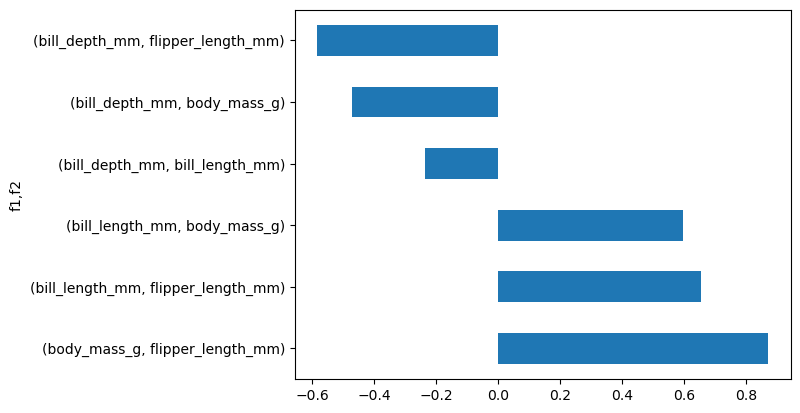

In [56]:
X.r.plot.barh();